<a href="https://colab.research.google.com/github/geraldoaax/previsao_de_lucros_ml/blob/main/Projeto_2_TAREFA_Previs%C3%A3o_de_Lucros_(sorvetes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do problema

- Base de dados:
  - Input (X): Temperatura
  - Output (Y): Lucro diário em dólares 

# Etapa 1: Importação das bibliotecas

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.12.0'

# Etapa 2: Importação da base de dados

In [9]:
sales_df = pd.read_csv('/content/SalesData.csv')
sales_df.reset_index(drop = True, inplace = True)


In [10]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [14]:
sales_df.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [13]:
sales_df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [15]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [16]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# Etapa 3: Visualização da base de dados

<Axes: xlabel='Temperature', ylabel='Revenue'>

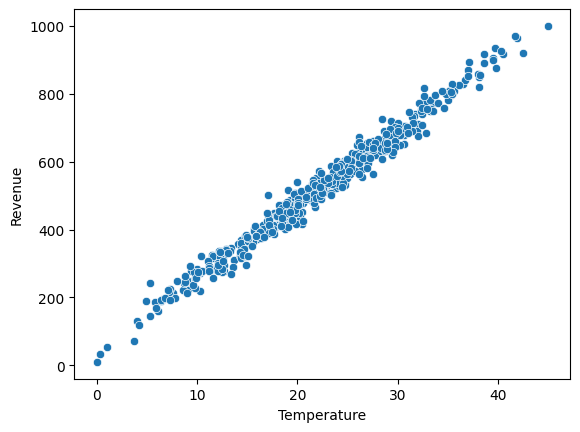

In [17]:
sns.scatterplot(x=sales_df['Temperature'], y=sales_df['Revenue'])


# Etapa 4: Criação das variáveis da base de dados

In [18]:
X_train = sales_df['Temperature']
y_train = sales_df['Revenue']

In [19]:
X_train

0      24.566884
1      26.005191
2      27.790554
3      20.595335
4      11.503498
         ...    
495    22.274899
496    32.893092
497    12.588157
498    22.362402
499    28.957736
Name: Temperature, Length: 500, dtype: float64

In [20]:
y_train


0      534.799028
1      625.190122
2      660.632289
3      487.706960
4      316.240194
          ...    
495    524.746364
496    755.818399
497    306.090719
498    566.217304
499    655.660388
Name: Revenue, Length: 500, dtype: float64

In [21]:
X_train.shape


(500,)

In [22]:
y_train.shape


(500,)

# Etapa 5: Criação e construção do modelo

In [ ]:
# Construção do modelo sequencial

In [27]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 10, input_shape = [1]))
model.add(tf.keras.layers.Dense(units = 1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                20        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')


In [30]:
epochs_hist = model.fit(X_train, y_train, epochs = 1000)


Epoch 1/1000
16/16 [==============================] - 0s 4ms/step - loss: 654.8441
Epoch 2/1000
16/16 [==============================] - 0s 3ms/step - loss: 639.5648
Epoch 3/1000
16/16 [==============================] - 0s 3ms/step - loss: 648.7877
Epoch 4/1000
16/16 [==============================] - 0s 3ms/step - loss: 717.7780
Epoch 5/1000
16/16 [==============================] - 0s 3ms/step - loss: 620.6589
Epoch 6/1000
16/16 [==============================] - 0s 3ms/step - loss: 656.1848
Epoch 7/1000
16/16 [==============================] - 0s 3ms/step - loss: 662.7284
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 641.1600
Epoch 9/1000
16/16 [==============================] - 0s 3ms/step - loss: 664.6642
Epoch 10/1000
16/16 [==============================] - 0s 3ms/step - loss: 627.7911
Epoch 11/1000
16/16 [==============================] - 0s 2ms/step - loss: 656.4309
Epoch 12/1000
16/16 [==============================] - 0s 2ms/step - loss: 660.1661
E

# Etapa 6: Avaliação do modelo 

In [31]:
epochs_hist.history.keys()

dict_keys(['loss'])

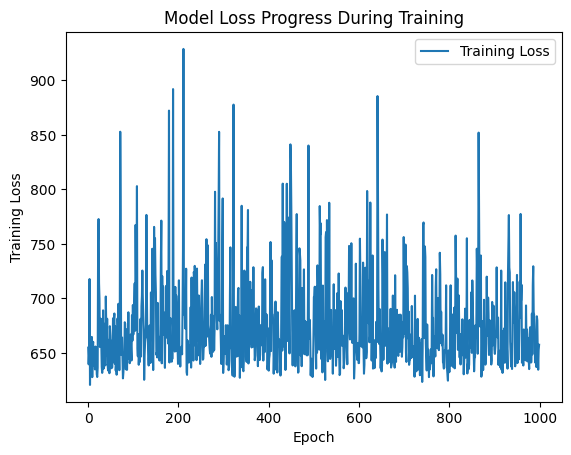

In [32]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss']);

In [33]:
model.get_weights()

[array([[ 0.01730623,  0.01184685,  0.01415587, -0.01018008,  0.01244526,
          3.3395696 , -0.08229806,  0.01519145, -0.02123233,  3.1417623 ]],
       dtype=float32),
 array([-0.5984878 , -0.40608814, -0.43502074,  0.31259397, -0.37841535,
         5.223872  ,  2.060796  , -0.46703783,  0.6702318 ,  5.016888  ],
       dtype=float32),
 array([[ 3.2410240e-03],
        [ 1.8503749e-03],
        [ 6.5751541e-03],
        [-9.3329046e-03],
        [-1.0464760e-03],
        [ 3.4311156e+00],
        [ 1.4501828e-03],
        [-1.3138300e-03],
        [ 4.8124895e-04],
        [ 3.1944485e+00]], dtype=float32),
 array([10.957298], dtype=float32)]

In [34]:
temp = 5
revenue = model.predict([temp])
print('Revenue Predictions Using Trained ANN =', revenue)

1/1 [==============================] - 0s 412ms/step
Revenue Predictions Using Trained ANN = [[152.3768]]


16/16 [==============================] - 0s 2ms/step


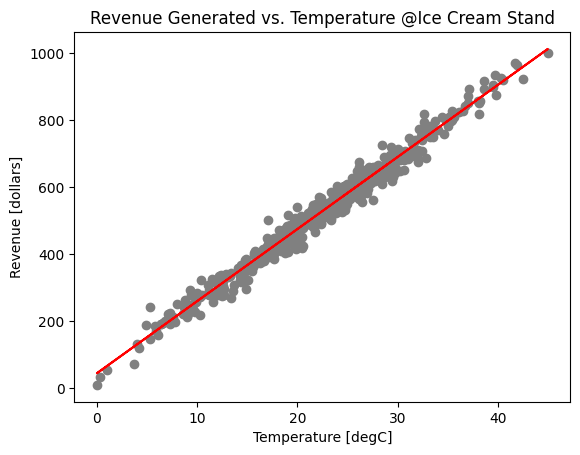

In [35]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand');

# Etapa 7: Confirmar os resultados usando sklearn
* Outro modelo - concorrente tensor flow

In [36]:
X_train.shape

(500,)

In [37]:
X_train = X_train.values.reshape(-1,1)

In [38]:
X_train.shape

(500, 1)

In [39]:
y_train = y_train.values.reshape(-1,1)

In [40]:
y_train.shape

(500, 1)

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [42]:
regressor.coef_

array([[21.44362551]])

In [43]:
regressor.intercept_

array([44.83126709])

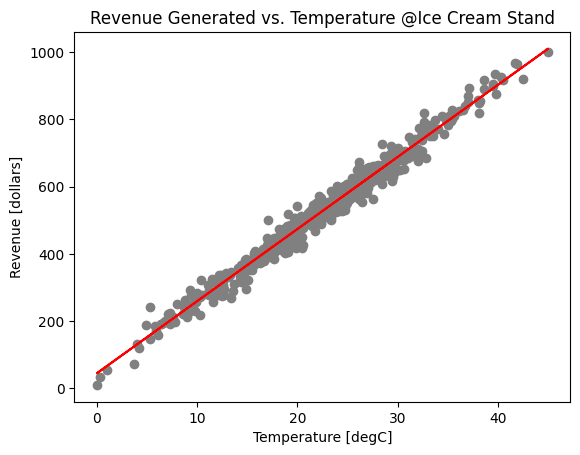

In [44]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand');

In [45]:
temp = 5
revenue = regressor.predict([[temp]])
print('Revenue Predictions Using Trained ANN =', revenue)

Revenue Predictions Using Trained ANN = [[152.04939464]]
